<a href="https://colab.research.google.com/github/chinmay250/Traffic-Prediction/blob/main/Traffic_Prediction_LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Traffic Prediction**
### **Problem Statement**
- Nowadays, many cities have problems with traffic congestion at certain peak hours, which
produces more pollution, noise and stress for citizens. Neural networks (NN) and machine-learning
(ML) approaches are increasingly used to solve real-world problems, overcoming analytical and
statistical methods, due to their ability to deal with dynamic behavior over time and with a large
number of parameters in massive data.

### **About Dataset**
- Road Traffic Prediction Dataset from Huawei munich Research Center is used,a public dataset for traffic prediction derived from a variety of traffic sensors i.e induction loops.
- The Data is used to forecast traffic patterns and modify stoplight control parameters.
- The Data is Recorded for 56 Days at a interval of 5 minutes which depicts the Number of Vehicles passing every 5 minutes.
- Four of Six intersection are used to simulate 4 lanes of intersections.


### **Objective**
- To predict future traffic conditions on a transportation network based on historical observations.

## **Libraries**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!pip install pmdarima
!pip install simple_colors
!pip install pandas_profiling

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# Importing the necesary libraries for Analysis
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import math
from simple_colors import *
import plotly.express as px
import plotly.graph_objects as go
from sklearn.preprocessing import MinMaxScaler
from keras.models import load_model
from keras.utils.vis_utils import plot_model
import sklearn.metrics as metrics
new_color =["#537AB9","#008EAA","#00A9B1","#15C2A9","#68D997","#AFEB80","#F9F871","#7C6AAF"]

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.statespace.varmax import VARMAX
from statsmodels.tsa.api import VAR
from statsmodels.tsa.stattools import grangercausalitytests, adfuller
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

from tqdm import tqdm_notebook
import statsmodels.api as sm

import warnings
warnings.filterwarnings("ignore")
import copy
import tensorflow as tf
from tensorflow.keras.callbacks import CSVLogger, EarlyStopping

scaler = MinMaxScaler(feature_range=(0,1))
from tqdm import tqdm
from pylab import rcParams
import plotly.express as px
from plotly.subplots import make_subplots
from sklearn.preprocessing import PowerTransformer
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.metrics import mean_absolute_percentage_error
from statsmodels.tsa.ar_model import AutoReg
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.holtwinters import ExponentialSmoothing, Holt, SimpleExpSmoothing
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import month_plot
from pmdarima.arima import auto_arima
from datetime import datetime, timedelta
from dateutil.relativedelta import relativedelta



In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random

from matplotlib.ticker import StrMethodFormatter
from statsmodels.tsa.stattools import adfuller
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout, RepeatVector, TimeDistributed,GRU
from sklearn.metrics import mean_squared_error
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.backend import clear_session

from tensorflow.random import set_seed
set_seed(42)

%matplotlib inline

plt.style.use('ggplot')


In [ ]:
# Reading the dataset of traffic prediction dataset
df = pd.read_csv("/content/drive/MyDrive/Traffic Prediction/Traffic_prediction (1)/traffic-prediction-dataset.csv")

In [ ]:
df_copy = copy.deepcopy(df)

In [ ]:
df.head()

Cross 1   Cross 2   Cross 3   Cross 4   Cross 5   Cross 6
0    105.0      48.0        30      62.0        31     110.0
1     97.0      41.0        32      55.0        42     103.0
2     76.0      47.0        44      58.0        40     100.0
3     98.0      40.0        39      59.0        43     104.0
4     87.0      41.0        47      49.0        35     112.0

## **Statistics**

In [ ]:

def initial_overview(df):

        '''
        This function allows to view initial overview of the data.
        Such as number of rows, features and feature labels,
        is/are there any missing value/s in the data set?,
        unique values in the dataset


        '''
        print('Overview of the Dataset')

        #shape of the Dataset
        print('\nShape:',df.shape)

        #Rows in the dataset
        print("Rows:", df.shape[0])

        #Column or Feature in the dataset
        print("\nNumber of features:", df.shape[1])

        print("\nFeatures:")
        print(df.columns.tolist())

        #missing value
        missing_value = df.isnull().sum().values.sum()

        if missing_value == 0:
            print('\nMissing Values: No Missing Values')
        else:
            print('\nMissing Values:', missing_value)

        #unique value

        print("\nUnique values:")
        print(df.nunique())

        #Data Type
        print("\nDatatype:")
        print(df.dtypes)

        #Describe
        print("\nStatistics:")
        print(df.describe().T)

initial_overview(df)

Overview of the Dataset

Shape: (16128, 6)
Rows: 16128

Number of features: 6

Features:
['Cross 1', ' Cross 2', ' Cross 3', ' Cross 4', ' Cross 5', ' Cross 6']

Missing Values: No Missing Values

Unique values:
Cross 1     635
 Cross 2    477
 Cross 3    198
 Cross 4    548
 Cross 5    187
 Cross 6    469
dtype: int64

Datatype:
Cross 1     float64
 Cross 2    float64
 Cross 3      int64
 Cross 4    float64
 Cross 5      int64
 Cross 6    float64
dtype: object

Statistics:
            count       mean        std  min  25%   50%    75%    max
Cross 1   16128.0  95.806207  87.586717  0.0  8.0  88.0  169.0  352.5
 Cross 2  16128.0  45.948444  50.865051  0.0  2.0  29.0   77.0  302.0
 Cross 3  16128.0  41.510355  41.849582  0.0  1.0  32.0   73.0  218.0
 Cross 4  16128.0  67.656870  68.536141  0.0  0.0  45.0  124.0  312.0
 Cross 5  16128.0  36.232453  37.372452  0.0  1.0  28.0   60.0  193.0
 Cross 6  16128.0  76.215185  68.101792  0.0  5.0  66.0  139.0  253.0


In [ ]:
from pandas_profiling import ProfileReport
pf1 = ProfileReport(df,title = 'Profile Report')
pf1

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

## **Preprocessing**

In [ ]:
## Adding Date to the Dataframe.

data_col = pd.date_range(start='2023-01-01 00:00:00',periods=df.shape[0], freq='300s')
data_col = pd.DataFrame({"Date":data_col})
df = pd.concat([data_col,df],axis=1)
df.head()

Date  Cross 1   Cross 2   Cross 3   Cross 4   Cross 5  \
0 2023-01-01 00:00:00    105.0      48.0        30      62.0        31   
1 2023-01-01 00:05:00     97.0      41.0        32      55.0        42   
2 2023-01-01 00:10:00     76.0      47.0        44      58.0        40   
3 2023-01-01 00:15:00     98.0      40.0        39      59.0        43   
4 2023-01-01 00:20:00     87.0      41.0        47      49.0        35   

    Cross 6  
0     110.0  
1     103.0  
2     100.0  
3     104.0  
4     112.0

In [ ]:
# Setting date as an Index

df.set_index('Date',drop = True, inplace =True)

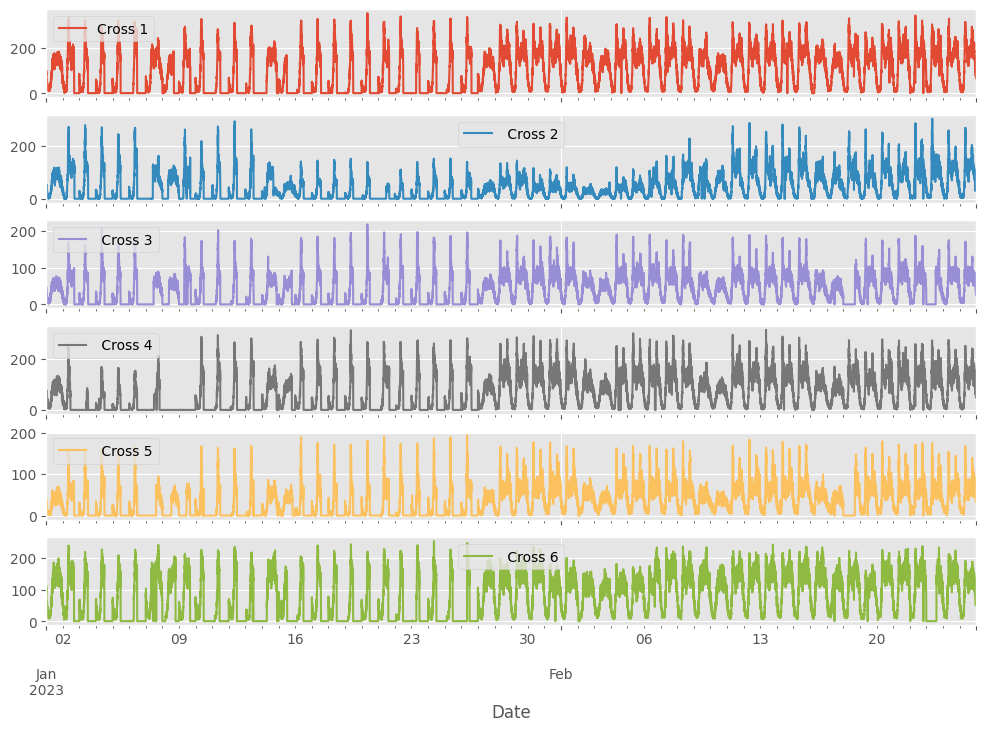

In [ ]:
plot_cols = df.columns

plot_features = df[plot_cols]
_ = plot_features.plot(subplots=True, figsize=(12,8))

In [ ]:
## Recplacing spaces in Columns names with '_'

df.columns = df.columns.str.replace(' ', '')

## converting all values to floats

for i in df.columns:
    df[i] = df[i].astype("float")

print("After converting to float Dtype \n",df.dtypes);df.head()

After converting to float Dtype 
 Cross1    float64
Cross2    float64
Cross3    float64
Cross4    float64
Cross5    float64
Cross6    float64
dtype: object


Cross1  Cross2  Cross3  Cross4  Cross5  Cross6
Date                                                               
2023-01-01 00:00:00   105.0    48.0    30.0    62.0    31.0   110.0
2023-01-01 00:05:00    97.0    41.0    32.0    55.0    42.0   103.0
2023-01-01 00:10:00    76.0    47.0    44.0    58.0    40.0   100.0
2023-01-01 00:15:00    98.0    40.0    39.0    59.0    43.0   104.0
2023-01-01 00:20:00    87.0    41.0    47.0    49.0    35.0   112.0

In [ ]:
## Taking on first 4 columns

df = df.iloc[:,:4]
df

Cross1  Cross2  Cross3  Cross4
Date                                               
2023-01-01 00:00:00   105.0    48.0    30.0    62.0
2023-01-01 00:05:00    97.0    41.0    32.0    55.0
2023-01-01 00:10:00    76.0    47.0    44.0    58.0
2023-01-01 00:15:00    98.0    40.0    39.0    59.0
2023-01-01 00:20:00    87.0    41.0    47.0    49.0
...                     ...     ...     ...     ...
2023-02-25 23:35:00    85.0    37.0    34.0    56.0
2023-02-25 23:40:00    71.0    45.0    44.0    50.0
2023-02-25 23:45:00    83.0    34.0    34.0    61.0
2023-02-25 23:50:00    89.0    39.0    25.0    48.0
2023-02-25 23:55:00    66.0    36.0    26.0    50.0

[16128 rows x 4 columns]

In [ ]:
# Test for Normality of the Cross

# Import the required libraries
import scipy.stats as stats

for i in df.columns:
    # Calculate the test statistics and p-value
    stat, p = stats.normaltest(df[i])

    # Print the results
    print(f"For {i}\n")

    print('Statistics=%.3f, p=%.3f' % (stat, p))

    # Set the significance level
    alpha = 0.05

    # Make a decision on the test result
    if p > alpha:
        print('Data looks Gaussian (fail to reject H0)')
    else:
        print('Data does not look Gaussian (reject H0)')
    print("--"*20)

For Cross1

Statistics=10686.318, p=0.000
Data does not look Gaussian (reject H0)
----------------------------------------
For Cross2

Statistics=2856.109, p=0.000
Data does not look Gaussian (reject H0)
----------------------------------------
For Cross3

Statistics=1612.553, p=0.000
Data does not look Gaussian (reject H0)
----------------------------------------
For Cross4

Statistics=1577.633, p=0.000
Data does not look Gaussian (reject H0)
----------------------------------------


for Cross1 : 



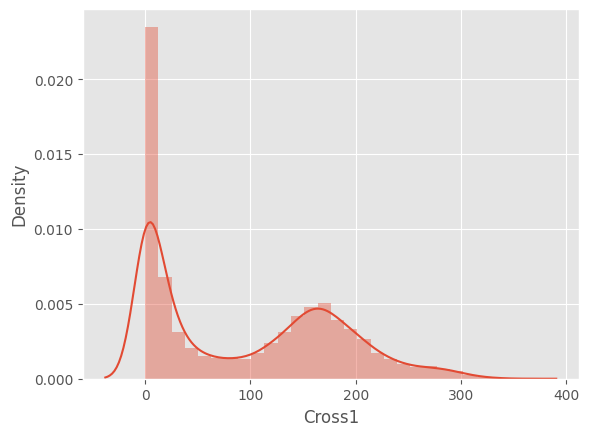

Kurtosis of normal distribution: -1.1630842880380485
Skewness of normal distribution: 0.36860238022978864
--------------------------------------------------------------------------------


for Cross2 : 



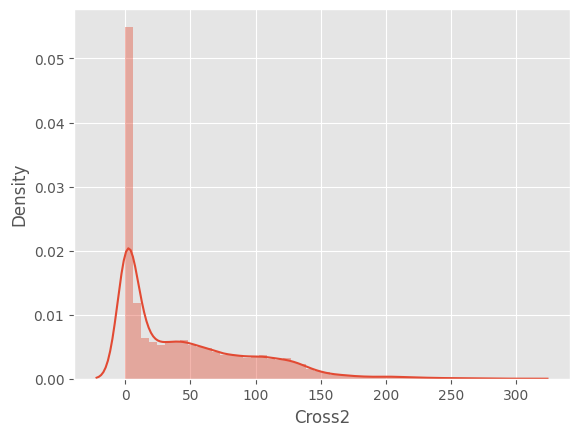

Kurtosis of normal distribution: 1.1223123812209943
Skewness of normal distribution: 1.200010778274245
--------------------------------------------------------------------------------


for Cross3 : 



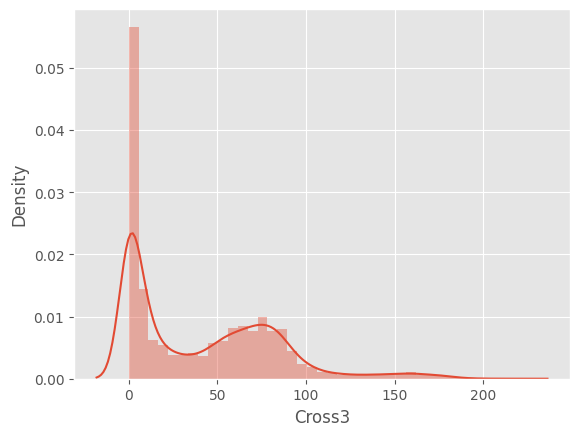

Kurtosis of normal distribution: 0.30783296009740324
Skewness of normal distribution: 0.8779811484692716
--------------------------------------------------------------------------------


for Cross4 : 



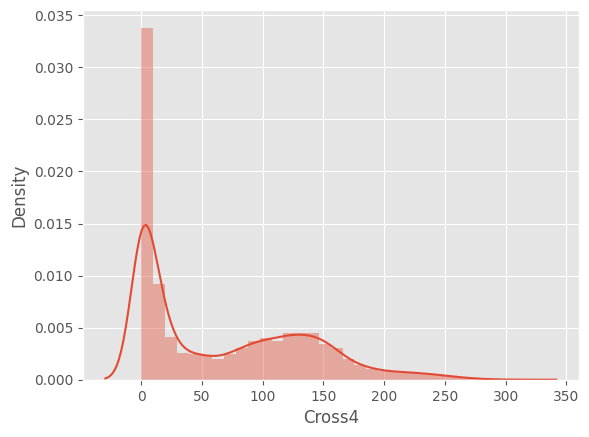

Kurtosis of normal distribution: -0.6067654622964951
Skewness of normal distribution: 0.6827881664215681
--------------------------------------------------------------------------------




In [ ]:

## Checking distribution skewness and kurtosis

for i in df.columns:
    print(f"for {i} : \n")
    sns.distplot(df[i])
    plt.show()
    print( 'Kurtosis of normal distribution: {}'.format(stats.kurtosis(df[i])))
    print( 'Skewness of normal distribution: {}'.format(stats.skew(df[i])))
    print("----"*20)
    print("\n")

- The kurtosis of a normal distribution is close to zero, and if the kurtosis is greater than zero, the distribution has heavier tails.

- skewness measures the symmetry of the distribution. If the skewness is between -0.5 and 0.5, the data is considered fairly symmetrical.

- if the skewness falls between -1 and -0.5 or between 0.5 and 1, the data is considered moderately skewed.

- if the skewness is less than -1 or greater than 1, the data is considered highly skewed. In this particular case, the skewness value is greater than 1, indicating a highly skewed distribution.

## **EDA**

In [ ]:
df.reset_index(drop =False,inplace = True)

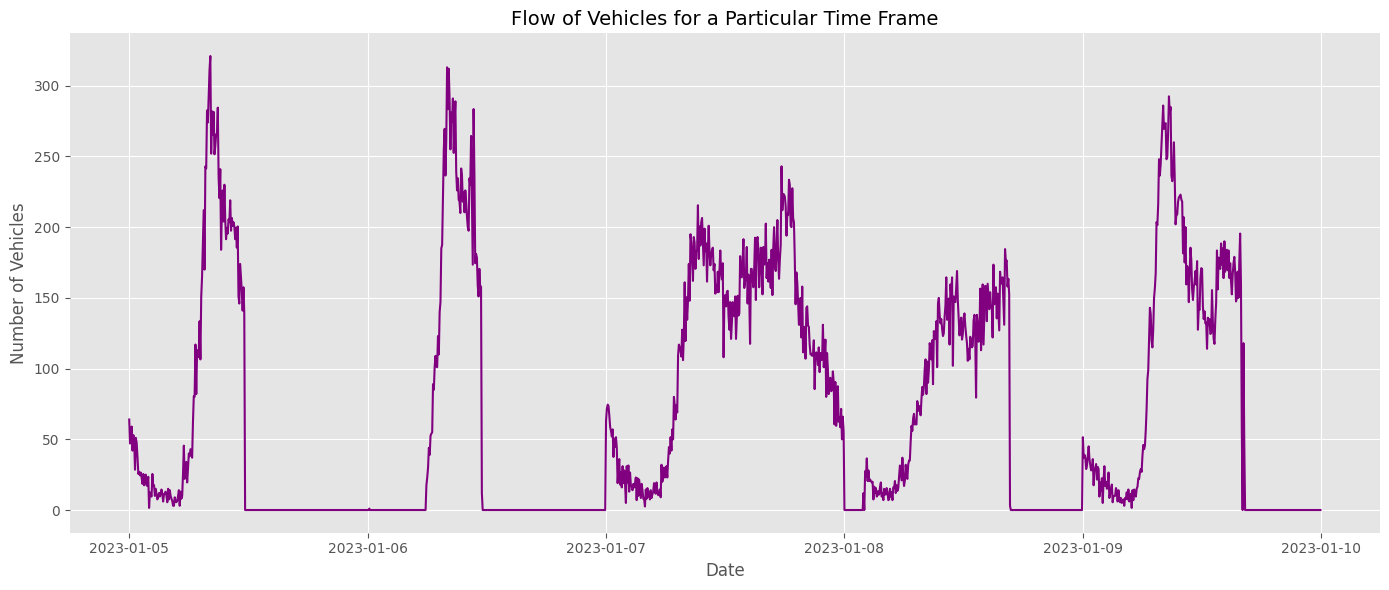

In [ ]:
data1 = df[(df.Date >= '2023-01-05') & (df.Date < '2023-01-10')]

plt.figure(figsize=(14,6))
plt.plot(data1.Date, data1.Cross1, color='purple')
plt.ylabel('Number of Vehicles', fontsize=12)
plt.xlabel('Date', fontsize=12)
plt.title('Flow of Vehicles for a Particular Time Frame', fontsize=14)
plt.tight_layout()
plt.grid(True)
sns.despine(bottom=True, left=True)
plt.show()

In [ ]:
data1=df.loc[:,['Date','Cross1']]
data1.set_index('Date',inplace=True)


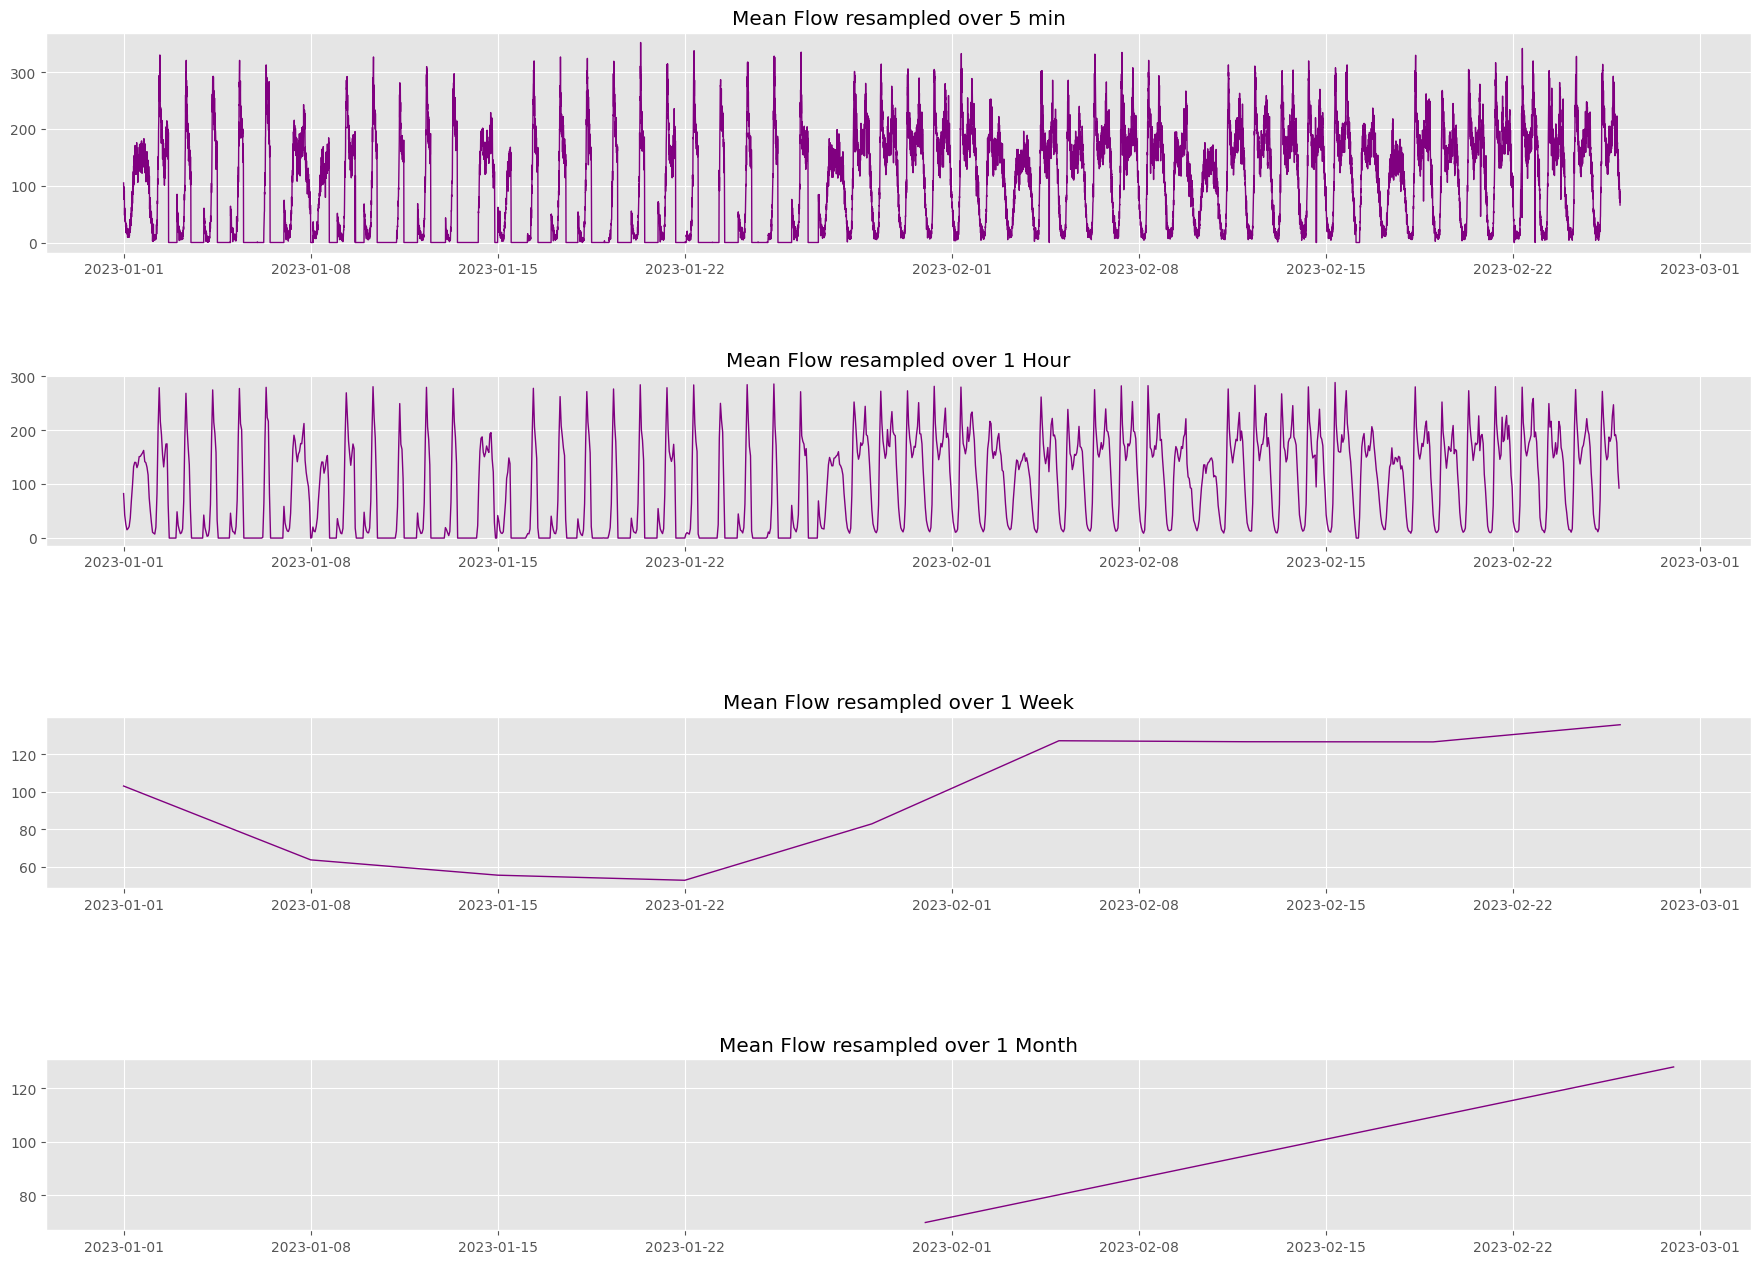

In [ ]:
# Create a figure with specified size
fig = plt.figure(figsize=(22,20))
# Adjust the subplot spacing
fig.subplots_adjust(hspace=1)

# Create first subplot
ax1 = fig.add_subplot(4,1,1)
# Plot the resampled mean of Global_active_power over day with different color
ax1.plot(data1['Cross1'].resample('5min').mean(), linewidth=1, color='purple')
# Set the title for the subplot
ax1.set_title('Mean Flow resampled over 5 min')
# Set major tick parameters for the subplot
ax1.tick_params(axis='both', which='major')


# Create second subplot
ax2 = fig.add_subplot(5,1,2, sharex=ax1)
# Plot the resampled mean of Global_active_power over week with different color
ax2.plot(data1['Cross1'].resample('H').mean(), linewidth=1, color='purple')
# Set the title for the subplot
ax2.set_title('Mean Flow resampled over 1 Hour')
# Set major tick parameters for the subplot
ax2.tick_params(axis='both', which='major')


# Create third subplot
ax3 = fig.add_subplot(5,1,3, sharex=ax1)
# Plot the resampled mean of Global_active_power over week with different color
ax3.plot(data1['Cross1'].resample('W').mean(), linewidth=1, color='purple')
# Set the title for the subplot
ax3.set_title('Mean Flow resampled over 1 Week')
# Set major tick parameters for the subplot
ax3.tick_params(axis='both', which='major')

# Create fourth subplot
ax4 = fig.add_subplot(5,1,4, sharex=ax1)
# Plot the resampled mean of Global_active_power over week with different color
ax4.plot(data1['Cross1'].resample('M').mean(), linewidth=1, color='purple')
# Set the title for the subplot
ax4.set_title('Mean Flow resampled over 1 Month')
# Set major tick parameters for the subplot
ax4.tick_params(axis='both', which='major')






## **Stationarity Check using ADF**

In [ ]:
def test_stationarity(timeseries):
    # Calculate rolling mean and standard deviation
    rolmean = timeseries.rolling(window=12).mean()
    rolstd = timeseries.rolling(window=12).std()

    # Plot original timeseries, rolling mean, and rolling standard deviation
    plt.figure(figsize=(20,5))
    sns.despine(left=True)
    orig = plt.plot(timeseries, color='purple',label='Original')
    mean = plt.plot(rolmean, color='yellow', label='Rolling Mean')
    std = plt.plot(rolstd, color='cyan', label = 'Rolling Std')

    # Add legend
    plt.legend(loc='best')
    # Add title
    plt.title('Rolling Mean & Standard Deviation of Cross')
    plt.show()

    # Perform and display results of Dickey-Fuller test
    print ('<Results of Dickey-Fuller Test>')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4],
                     index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)

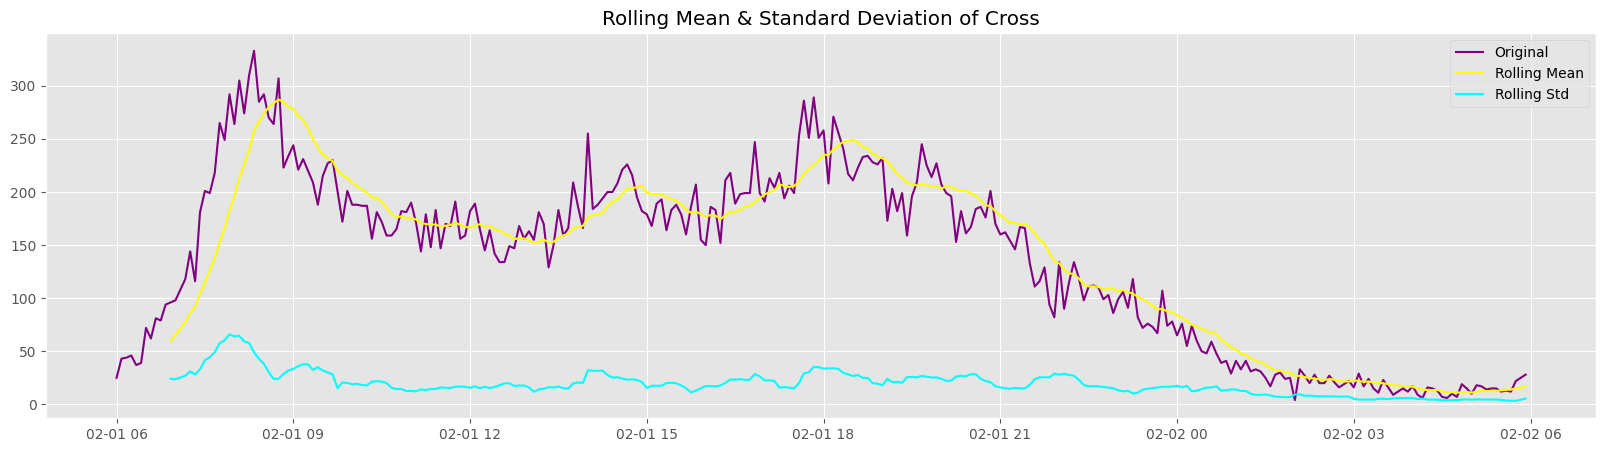

<Results of Dickey-Fuller Test>
Test Statistic                  -1.315064
p-value                          0.622253
#Lags Used                       4.000000
Number of Observations Used    283.000000
Critical Value (1%)             -3.453670
Critical Value (5%)             -2.871808
Critical Value (10%)            -2.572241
dtype: float64


In [ ]:
test_stationarity(data1[9000:9288].Cross1.dropna())


In [ ]:
from statsmodels.tsa.stattools import adfuller

def check_stationarity(series):

    result = adfuller(series.values)


    print('ADF Statistic: %f' % result[0])
    print('p-value: ',result[1])
    print('Critical Values:')
    for key, value in result[4].items():
        print('\t%s: %.3f' % (key, value))

    if (result[1] <= 0.05) & (result[4]['5%'] > result[0]):
        print("\n\u001b[32mStationary\u001b[0m")
    else:
        print("\x1b[31mNon-stationary\x1b[0m")
print(red('\n\t\tADF Test\n\n', 'bold'))
for i in df.columns[1:]:
    check_stationarity(df[i])
    print("\n")
    print("*"*40)
    print("\n")


		ADF Test


ADF Statistic: -13.569866
p-value:  2.225655021694559e-25
Critical Values:
	1%: -3.431
	5%: -2.862
	10%: -2.567

Stationary


****************************************


ADF Statistic: -12.251356
p-value:  9.524282590768712e-23
Critical Values:
	1%: -3.431
	5%: -2.862
	10%: -2.567

Stationary


****************************************


ADF Statistic: -13.388190
p-value:  4.825976943025861e-25
Critical Values:
	1%: -3.431
	5%: -2.862
	10%: -2.567

Stationary


****************************************


ADF Statistic: -12.697152
p-value:  1.0997946862353138e-23
Critical Values:
	1%: -3.431
	5%: -2.862
	10%: -2.567

Stationary


****************************************




## **Modelling**

### **AP1**

#### **Functions**

In [ ]:
## 1. Splitting the Data into Train and Test

def split_data(data, test_size=0.2, analysis='univariate'):
    """
    Function to split time series data into train and test set
    Parameters:
        test_size: float, default=0.2
        analysis: {'univariate', 'univariate'}, default='univariate'
    """
    if analysis == 'univariate':
        position = int(round(len(data) * (1-test_size)))
        train = np.array(data[:position]).reshape(-1,1)
        test = np.array(data[position:]).reshape(-1,1)

    elif analysis == 'multivariate':
        position = int(round(len(data) * (1-test_size)))
        train = data[:position]
        test = data[position:]

    else:
        print("Please specify if analysis is univariate or multivariate")

    return train, test



## 2. Scaling the Data

def scale(data, train_split):
    """
    Function to scale the entire dataset using the mean and standard deviation of the training data only
    """
    data_mean = data[:train_split].mean(axis=0)
    data_std = data[:train_split].std(axis=0)

    return (data - data_mean) / data_std


## 3. Inverse Scaling the Data
def inv_scale(data, scaled_data, train_split):
    """
    Function to inverse scaling of data by using the mean and standard deviation of the training data only
    """
    data_mean = data[:train_split].mean(axis=0)
    data_std = data[:train_split].std(axis=0)

    return scaled_data * data_std + data_mean



In [ ]:
# Create Models


## LSTM model type: Univariate multi-step prediction

def create_samples_univar(data, n_input, n_output):
    """
    Function to convert time series observations
    into input X and output y
    """
    X, y = [], []

    for i in range(n_input, len(data)): #start, stop
        if i+n_output > len(data):
            break
        X.append(data[i-n_input : i])
        y.append(data[i : i+n_output])

    return np.array(X), np.array(y)


## LSTM model type: Multivariate multi-step prediction

def create_samples_multivar(data, n_input, n_output, target_index=0):
    """
    Function to convert time series observations
    into input X and output y
    """
    X, y = [], []

    # Move column defined by target_index to first position
    a = data[:, target_index].reshape(-1,1)
    b = np.delete(data, target_index, axis=1)
    data = np.concatenate((a, b), axis=1)

    for i in range(n_input, len(data)): #start, stop
        if i+n_output > len(data):
            break
        X.append(data[i-n_input : i, :])
        y.append(data[i : i+n_output, 0])

    return np.array(X), np.array(y)


In [ ]:
# Model Evaluation

def summarize_scores(name, score, scores):
    """
    Function to summarize scores
    """
    s_scores = ', '.join(['%.1f' % s for s in scores])
    print('%s: [%.3f] %s' % (name, score, s_scores))


def plot_model(history):
    """
    Function to plot training and validation loss
    """
    plt.figure(figsize=(10,5))
    plt.plot(history.history["loss"], color="r", label="Training Loss")
    plt.plot(history.history["val_loss"], color="b", label="Validation Loss")
    plt.legend(loc="upper right")
    plt.xlabel("Epoch", fontsize=16)
    plt.ylabel("Loss", fontsize=16)
    plt.ylim([0, max(plt.ylim())])
    plt.title("Training and Validation Loss", fontsize=16);



#### **Univariate LSTM Models (multi-step prediction)**

- Data input


In [ ]:
feature = df['Cross1']
feature.index = df.reset_index()['Date']
feature.head()

Date
2023-01-01 00:00:00    105.0
2023-01-01 00:05:00     97.0
2023-01-01 00:10:00     76.0
2023-01-01 00:15:00     98.0
2023-01-01 00:20:00     87.0
Name: Cross1, dtype: float64

- Data Scaling

In [ ]:
# Define train/test split
test_size = 0.25
TRAIN_SPLIT = int(round(len(df) * (1-test_size)))
TRAIN_SPLIT

12096

In [ ]:
# Get data values
univar_data = feature.values
univar_data

array([105.,  97.,  76., ...,  83.,  89.,  66.])

In [ ]:
# Scale data (using training data)
univar_data_scaled = scale(univar_data, TRAIN_SPLIT)
print("Shape --> ",univar_data_scaled.shape)
print("Data --> ",univar_data_scaled)


Shape -->  (16128,)
Data -->  [ 0.24123363  0.14920849 -0.09235751 ... -0.01183551  0.05718335
 -0.20738894]


In [ ]:
# # Scale data

# scaler = MinMaxScaler()
# univar_data = np.reshape(univar_data, (-1, 1))
# univar_data_scaled = scaler.fit_transform(univar_data)



In [ ]:
univar_data_scaled

array([ 0.24123363,  0.14920849, -0.09235751, ..., -0.01183551,
        0.05718335, -0.20738894])

In [ ]:
from scipy._lib.doccer import unindent_dict
unindent_dict

<function scipy._lib.doccer.unindent_dict(docdict)>

- Train Test split

In [ ]:
# Split data into train and test
train, test = split_data(data=univar_data_scaled, test_size=test_size, analysis='univariate')

# Print shape and first 5 values for train set
print("Shape train:", train.shape, "\nShape test:", test.shape, '\n')
print(train[:5])

Shape train: (12096, 1) 
Shape test: (4032, 1) 

[[ 0.24123363]
 [ 0.14920849]
 [-0.09235751]
 [ 0.16071163]
 [ 0.03417706]]


In [ ]:
# Create samples for train and test set
n_input = 12
n_output = 1

X_train, y_train = create_samples_univar(train, n_input=n_input, n_output=n_output)
X_test, y_test = create_samples_univar(test, n_input=n_input, n_output=n_output)

# Print shape and first 3 values for train set
print("Shape X_train y_train:", X_train.shape, y_train.shape,
      "\nShape X_test y_test:", X_test.shape, y_test.shape, '\n')
# for i in range(2):
#     print(X_train[i], y_train[i])

Shape X_train y_train: (12084, 12, 1) (12084, 1, 1) 
Shape X_test y_test: (4020, 12, 1) (4020, 1, 1) 



 - LSTM Model With Univariate Input and Vector Output

Like other types of neural network models, the LSTM can output a vector directly that can be interpreted as a multi-step forecast.

Data already has the correct input shape [samples, timesteps, features]

In [ ]:
# Create model

n_features = X_train.shape[2]
n_input = X_train.shape[1]
n_output = y_train.shape[1]

model = Sequential()
model.add(LSTM(100, activation='relu', return_sequences=True, input_shape=(n_input, n_features)))
model.add(Dropout(0.2))
model.add(LSTM(100, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(n_output,activation='sigmoid'))
model.compile(optimizer='adam', loss='mse', metrics='mae') # mae: mean absolute error
model.summary()

Model: "sequential_37"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_72 (LSTM)              (None, 12, 100)           40800     
                                                                 
 dropout_48 (Dropout)        (None, 12, 100)           0         
                                                                 
 lstm_73 (LSTM)              (None, 100)               80400     
                                                                 
 dropout_49 (Dropout)        (None, 100)               0         
                                                                 
 dense_37 (Dense)            (None, 1)                 101       
                                                                 
Total params: 121,301
Trainable params: 121,301
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# %%time

# # Fit model
# epochs = 50
# verbose = True
# batch_size = 128 #default 32

# history = model.fit(X_train, y_train, epochs=epochs, verbose=verbose,
#                     batch_size=batch_size, validation_data=(X_test, y_test))

In [ ]:
%%time

# Fit model
callbacks = EarlyStopping(monitor="val_loss", patience=5)
epochs = 50
verbose = True
batch_size = 128 #default 32

history = model.fit(X_train, y_train, epochs=epochs, verbose=verbose, callbacks=callbacks,
                    batch_size=batch_size, validation_data=(X_test, y_test))

Epoch 1/50
95/95 [==============================] - 12s 131ms/step - loss: 0.5008 - mae: 0.5968 - val_loss: 0.2991 - val_mae: 0.4199
Epoch 2/50
95/95 [==============================] - 6s 65ms/step - loss: 0.5004 - mae: 0.5962 - val_loss: 0.2987 - val_mae: 0.4195
Epoch 3/50
95/95 [==============================] - 9s 96ms/step - loss: 0.5001 - mae: 0.5956 - val_loss: 0.2990 - val_mae: 0.4195
Epoch 4/50
95/95 [==============================] - 6s 64ms/step - loss: 0.4997 - mae: 0.5952 - val_loss: 0.2986 - val_mae: 0.4187
Epoch 5/50
95/95 [==============================] - 9s 96ms/step - loss: 0.4997 - mae: 0.5955 - val_loss: 0.2987 - val_mae: 0.4194
Epoch 6/50
95/95 [==============================] - 6s 65ms/step - loss: 0.4998 - mae: 0.5953 - val_loss: 0.2988 - val_mae: 0.4193
Epoch 7/50
95/95 [==============================] - 9s 94ms/step - loss: 0.4997 - mae: 0.5951 - val_loss: 0.2991 - val_mae: 0.4201
Epoch 8/50
95/95 [==============================] - 6s 67ms/step - loss: 0.4997 -

In [ ]:
## Optimazation learning curves

plot_model(history)


AttributeError: ignored

In [ ]:
# Loss and mae value for the model in test mode
score = model.evaluate(X_test, y_test, verbose = 0)
print(f'Test loss: {score[0]:.4f}')
print(f'Test mae: {score[1]:.4f}')

In [ ]:
# List all data in history
print(history.history.keys())

In [ ]:
history.history["loss"][:5]

- Model Prediction

In [ ]:
# Reshape data for prediction into [1, n_input, 1]
x_input = X_test[0].reshape((1, len(X_test[0]), 1))
x_input.shape

In [ ]:
# Make prediction
yhat = model.predict(x_input, verbose=0)

print(yhat.shape)
yhat

- Inverse DataScaling

In [ ]:
# Inverse scaling of prediction
yhat_inv = inv_scale(univar_data, yhat, TRAIN_SPLIT)
print(yhat_inv.shape)
yhat_inv

In [ ]:
# Inverse scaling of X_test, y_test
X_test_inv = inv_scale(univar_data, X_test, TRAIN_SPLIT)
y_test_inv = inv_scale(univar_data, y_test, TRAIN_SPLIT)

X_test_inv.shape, y_test_inv.shape

- Plot Model Prediction

In [ ]:
# Plot prediction
plt.figure(figsize=(6,3.5))

past_seq = range(-len(X_test[0])+1, 1)
future_seq = np.arange(1, len(y_test[0])+1)

plt.plot(past_seq, X_test_inv[0], color='blue', marker='.', label='History')
plt.plot(future_seq, y_test_inv[0], marker='x', label='True Future')
plt.plot(future_seq, yhat_inv.reshape(-1,1), color='green', marker='o', label='Model Prediction')

plt.xlabel('Time-Step')
plt.ylabel('Flow of Vehicles')
plt.xticks(range(-n_input,n_output,2))
plt.title('Univariate Stacked LSTM model: Multi-step prediction')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), fontsize=10);

In [ ]:
## Now randomly select 3 more samples from the test set, perform model prediction and plot results

for i in random.sample(range(len(X_test)), 3):
    print(f"Randomly selected sample: {i}")

    # Reshape data for prediction into [1, n_input, 1]
    x_input = X_test[i].reshape((1, len(X_test[i]), 1))

    # Make prediction
    pred = model.predict(x_input, verbose=0)

    # Inverse scaling of prediction
    pred_inv = inv_scale(univar_data, pred, TRAIN_SPLIT)

    # Plot prediction
    plt.figure(figsize=(6,3.5))

    past_seq = range(-len(X_test[0])+1, 1)
    future_seq = np.arange(1, len(y_test[0])+1)

    plt.plot(past_seq, X_test_inv[i], color='blue', marker='.', label='History')
    plt.plot(future_seq, y_test_inv[i], marker='x', label='True Future')
    plt.plot(future_seq, pred_inv.reshape(-1,1), color='green', marker='o', label='Model Prediction')

    plt.xlabel('Time-Step')
    plt.ylabel('Flow of Vehicles')
    plt.xticks(range(-n_input,n_output,2))
    plt.title('Univariate Stacked LSTM model: Multi-step prediction')
    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), fontsize=10)

- Evaluation of Metrics

In [ ]:
# Actual values
actual = y_test_inv[0]

# Predicted values
predicted = yhat_inv.reshape(-1,1)

In [ ]:
actual.shape, predicted.shape


In [ ]:
actual,predicted



In [ ]:
# Calculate RMSE score for each 5 min
rmse_day = []

for i in range(actual.shape[0]):
    # calculate rmse
    rmse = mean_squared_error(actual[i], predicted[i], squared=False)
    rmse_day.append(rmse)

rmse_day

In [ ]:
# Store RMSE scores of each day in df
df_rmse = pd.DataFrame(rmse_day, columns=['Univariate Stacked LSTM'])

In [ ]:
# Plot RMSE score for each 5 min
future_seq = np.arange(1, len(y_test[0])+1)

plt.figure(figsize=(6,3.5))
plt.plot(future_seq, rmse_day, marker='o', color='darkred')
plt.xlabel('Time-Step')
plt.ylabel('RMSE (Number)')
plt.title('Univariate Stacked LSTM model: RMSE per 5 min forecast');

In [ ]:
# Calculate overall RMSE score (for the respective forecast period)
rmse_total = mean_squared_error(actual, predicted, squared=False)
rmse_total

In [ ]:
# Store overall RMSE score in dict
performance_rmse = {}
performance_rmse['Univariate Stacked LSTM'] = rmse_total

In [ ]:
# Summarize scores
summarize_scores('RMSE scores for Univariate Stacked LSTM [total] per day', rmse_total, rmse_day)


#### **Multivariate LSTM Models (multi-step prediction)**

In [ ]:
corr1 = df.corr()
sns.heatmap(corr1,annot= True)

In [ ]:
features = df.iloc[:,1:]
features

- Data Scaling

In [ ]:
# Define train/test split
test_size = 0.25
TRAIN_SPLIT = int(round(len(df) * (1-test_size)))
TRAIN_SPLIT

In [ ]:
# Get data values
multivar_data = features.values

In [ ]:
# Scale data (using training data)
multivar_data_scaled = scale(multivar_data, TRAIN_SPLIT)
multivar_data_scaled.shape, multivar_data_scaled[0]

- Train Test Split

In [ ]:
# Split data into train and test
train, test = split_data(data=multivar_data_scaled, test_size=test_size, analysis='multivariate')

# Print shape and first 5 values for train set
print("Shape train:", train.shape, "\nShape test:", test.shape, '\n')
print(train[:9])
print(test[:9])

In [ ]:
# Create samples for train and test set
n_input = 120
n_output = 48
target_index = 2

X_train, y_train = create_samples_multivar(train, n_input=n_input, n_output=n_output, target_index=target_index)
X_test, y_test = create_samples_multivar(test, n_input=n_input, n_output=n_output, target_index=target_index)

# Print shape and first 3 values for train set
print("Shape X_train y_train:", X_train.shape, y_train.shape,
      "\nShape X_test y_test:", X_test.shape, y_test.shape, '\n')
for i in range(3):
    print(X_train[i], y_train[i])

In [ ]:
# Sanity check if create_samples did a good job

train[-5:], test[-5:]


- Stacked LSTM

In [ ]:
# Create model

n_features = X_train.shape[2]
n_input = X_train.shape[1]
n_output = y_train.shape[1]

model = Sequential()
model.add(LSTM(64, activation='relu', return_sequences=True, input_shape=(n_input, n_features)))
model.add(LSTM(64, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(n_output))
model.compile(optimizer='adam', loss='mse', metrics='mae')

model.summary()

In [ ]:
%%time

# Fit model
epochs = 50
verbose = True
batch_size = 128 #default 32

history = model.fit(X_train, y_train, epochs=epochs, verbose=verbose,
                    batch_size=batch_size, validation_data=(X_test, y_test))

In [ ]:
plot_model(history)


In [ ]:
# Loss and mae value for the model in test mode
score = model.evaluate(X_test, y_test, verbose = 0)
print(f'Test loss: {score[0]:.4f}')
print(f'Test mae: {score[1]:.4f}')


- Model Prediction


In [ ]:

# Reshape data for prediction into [1, n_input, n_features]
x_input = X_test[0].reshape((1, len(X_test[0]), n_features))
x_input.shape

In [ ]:
# Make prediction
yhat = model.predict(x_input, verbose=0)

print(yhat.shape)
yhat

In [ ]:
# Inverse scaling of prediction
yhat_inv = inv_scale(multivar_data[:,0], yhat, TRAIN_SPLIT)
print(yhat_inv.shape)
yhat_inv

In [ ]:
# Inverse scaling of X_test, y_test
X_test_inv = inv_scale(multivar_data, X_test, TRAIN_SPLIT)
y_test_inv = inv_scale(multivar_data[:,0], y_test, TRAIN_SPLIT)

X_test_inv.shape, y_test_inv.shape

- Plot Prediction

In [ ]:
# Plot prediction
plt.figure(figsize=(6,3.5))

past_seq = range(-len(X_test[0])+1, 1)
future_seq = np.arange(1, len(y_test[0])+1)

plt.plot(past_seq, X_test_inv[0][:,0], color='blue', marker='.', label='History')
plt.plot(future_seq, y_test_inv[0], marker='x', label='True Future')
plt.plot(future_seq, yhat_inv.reshape(-1,1), color='green', marker='o', label='Model Prediction')

plt.xlabel('Time-Step')
plt.ylabel('Flow of Vehicles')
plt.xticks(range(-n_input,n_output,2))
plt.title('Multivariate Stacked LSTM model: Multi-step prediction')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), fontsize=10);

In [ ]:
## Now randomly select 3 more samples from the test set, perform model prediction and plot results

for i in random.sample(range(len(X_test)), 3):
    print(f"Randomly selected sample: {i}")

    # Reshape data for prediction into [1, n_input, n_features]
    x_input = X_test[i].reshape((1, len(X_test[i]), n_features))

    # Make prediction
    pred = model.predict(x_input, verbose=0)

    # Inverse scaling of prediction
    pred_inv = inv_scale(univar_data, pred, TRAIN_SPLIT)

    # Plot prediction
    plt.figure(figsize=(6,3.5))

    past_seq = range(-len(X_test[0])+1, 1)
    future_seq = np.arange(1, len(y_test[0])+1)

    plt.plot(past_seq, X_test_inv[i][:,0], color='blue', marker='.', label='History')
    plt.plot(future_seq, y_test_inv[i], marker='x', label='True Future')
    plt.plot(future_seq, pred_inv.reshape(-1,1), color='green', marker='o', label='Model Prediction')

    plt.xlabel('Time-Step')
    plt.ylabel('Vehicle Flow')
    plt.xticks(range(-n_input,n_output,2))
    plt.title('Multivariate Stacked LSTM model: Multi-step prediction')
    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), fontsize=10);

- Evaluation Metrics

In [ ]:
# Actual values
actual = y_test_inv[0].reshape(-1,1)

# Predicted values
predicted = yhat_inv.reshape(-1,1)

In [ ]:
actual.shape, predicted.shape


In [ ]:
actual


In [ ]:
predicted

In [ ]:
# Calculate RMSE score for each day
rmse_day = []

for i in range(actual.shape[0]):
    # calculate rmse
    rmse = mean_squared_error(actual[i], predicted[i], squared=False)
    rmse_day.append(rmse)

rmse_day

In [ ]:
# Plot RMSE score for each day
future_seq = np.arange(1, len(y_test[0])+1)

plt.figure(figsize=(6,3.5))
plt.plot(future_seq, rmse_day, marker='o', color='darkred')
plt.xlabel('Time-Step')
plt.ylabel('RMSE (kW)')
plt.title('Multivariate Stacked LSTM model: RMSE per Day forecast');


In [ ]:
# Calculate overall RMSE score (for the respective forecast period)
rmse_total = mean_squared_error(actual, predicted, squared=False)
rmse_total

In [ ]:
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

In [ ]:
train_predict = inv_scale(multivar_data[:,0], train_predict, TRAIN_SPLIT)
test_predict = inv_scale(multivar_data[:,0], test_predict, TRAIN_SPLIT)


### **AP2**

#### **Creating Function**

##### **Functions**

In [ ]:

# LSTM
def lstm(X_train,Y_train,X_test,Y_test):
        # Defining the LSTM model
    model = Sequential()
    model.add(LSTM(100,activation='relu', return_sequences=True,input_shape=(X_train.shape[1], X_train.shape[2])))
    model.add(LSTM(100, activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(1,activation='sigmoid'))
    model.compile(loss='mean_squared_error', optimizer='adam')
    history = model.fit(X_train, Y_train, epochs=100, batch_size=128, validation_data=(X_test, Y_test),
                        callbacks=[EarlyStopping(monitor='val_loss', patience=4)], verbose=True, shuffle=False)

    return model,history


# GRU
def gru(X_train,Y_train,X_test,Y_test):
    # Defining the GRU model
    model = Sequential()
    model.add(GRU(64,return_sequences=True,input_shape=(X_train.shape[1], X_train.shape[2])))
    model.add(GRU,return_sequence = False)
    model.add(Dense(units=1))
    model.compile(loss='mean_square_error', optimizer='adam')
    history = model.fit(X_train,Y_train,epochs =100,batch_size=128, validation_data=(X_test, Y_test),
                        callbacks=[EarlyStopping(monitor='val_loss', patience=4)], verbose=True, shuffle=False)
    return model,history


# preprocessing
def univar(data,column:str,lookback):
    #Transform the Lane column of the data DataFrame into a numpy array of float values
    data = df
    i = column
    dataset = df[i].values.astype('float32')
    dataset = np.reshape(dataset, (-1, 1))
    scaler = MinMaxScaler(feature_range=(0, 1))
    dataset = scaler.fit_transform(dataset)


    #Split the transformed data into a training set (80%) and a test set (20%)
    train_size = int(len(dataset) * 0.80)
    test_size = len(dataset) - train_size
    train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]


    # convert an array of values into a dataset matrix
    def create_dataset(dataset, look_back=1):
        X, Y = [], []
        for i in range(len(dataset)-look_back-1):
            a = dataset[i:(i+look_back), 0]
            X.append(a)
            Y.append(dataset[i + look_back, 0])
        return np.array(X), np.array(Y)


    # reshape into X=t and Y=t+1
    look_back = lookback
    X_train, Y_train = create_dataset(train, look_back)
    X_test, Y_test = create_dataset(test, look_back)


        # reshape input to be [samples, time steps, features]
    X_train = np.reshape(X_train, (X_train.shape[0], 1, X_train.shape[1]))
    X_test = np.reshape(X_test, (X_test.shape[0], 1, X_test.shape[1]))


    return scaler,X_train,Y_train,X_test,Y_test


# Prediction
def prediction(day,scaler,model,history,X_train,Y_train,X_test,Y_test):
    start = -(day * 288)
        # make predictions
    model = model
    history = history
    scaler = scaler
    train_predict = model.predict(X_train)
    test_predict = model.predict(X_test)
        # invert predictions

    train_predict = scaler.inverse_transform(train_predict)
    Y_train = scaler.inverse_transform([Y_train])
    test_predict = scaler.inverse_transform(test_predict)
    Y_test = scaler.inverse_transform([Y_test])

    print("\n\t\tResults\n")

    print('\n\tTrain Mean Absolute Error:', mean_absolute_error(Y_train[0], train_predict[:,0]))
    print('\n\tTrain Root Mean Squared Error:',np.sqrt(mean_squared_error(Y_train[0], train_predict[:,0])))
    print('\n\tTest Mean Absolute Error:', mean_absolute_error(Y_test[0], test_predict[:,0]))
    print('\n\tTest Root Mean Squared Error:',np.sqrt(mean_squared_error(Y_test[0], test_predict[:,0])))

    plt.figure(figsize=(8,4))
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Test Loss')
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epochs')
    plt.legend(loc='upper right')
    plt.show()
    c = -start
    aa=[x for x in range(c)]
    # Creating a figure object with desired figure size
    plt.figure(figsize=(20,6))

    # Plotting the actual values in blue with a dot marker
    plt.plot(aa, Y_test[0][start:], marker='.', label="True Value", color='blue')
    # Plotting the predicted values in green with a solid line
    plt.plot(aa, test_predict[:,0][start:], '-', label="prediction", color='red')

    # Removing the top spines
    sns.despine(top=True)

    # Adjusting the subplot location
    plt.subplots_adjust(left=0.07)

    # Labeling the y-axis
    plt.ylabel('Flow of Vehicles', size=14)

    # Labeling the x-axis
    plt.xlabel('Time step', size=14)

    # Adding a legend with font size of 15
    plt.legend(fontsize=16)

    # Display the plot
    plt.show()


def lane_prediction(dataset,colname:str,model_name :str,lookback=12,day=1):

    if model_name == 'LSTM':
        scal,a,b,c,d = univar(dataset,colname,lookback)
        mod,his = lstm(a,b,c,d)
        prediction(day,scal,mod,his,a,b,c,d)
    elif model_name == 'GRU':
        scal,a,b,c,d = univar(dataset,colname,lookback)
        mod,his = gru(a,b,c,d)
        prediction(day,scal,mod,his,a,b,c,d)






##### **Cross1**

Epoch 1/100
101/101 [==============================] - 6s 22ms/step - loss: 0.1028 - val_loss: 0.0259
Epoch 2/100
101/101 [==============================] - 2s 17ms/step - loss: 0.0143 - val_loss: 0.0044
Epoch 3/100
101/101 [==============================] - 2s 16ms/step - loss: 0.0039 - val_loss: 0.0035
Epoch 4/100
101/101 [==============================] - 1s 12ms/step - loss: 0.0032 - val_loss: 0.0035
Epoch 5/100
101/101 [==============================] - 1s 9ms/step - loss: 0.0030 - val_loss: 0.0035
Epoch 6/100
101/101 [==============================] - 1s 10ms/step - loss: 0.0028 - val_loss: 0.0036
Epoch 7/100
101/101 [==============================] - 1s 10ms/step - loss: 0.0027 - val_loss: 0.0035
Epoch 8/100
101/101 [==============================] - 1s 10ms/step - loss: 0.0027 - val_loss: 0.0034
Epoch 9/100
101/101 [==============================] - 1s 10ms/step - loss: 0.0026 - val_loss: 0.0034
Epoch 10/100
101/101 [==============================] - 1s 10ms/step - loss: 0.0026

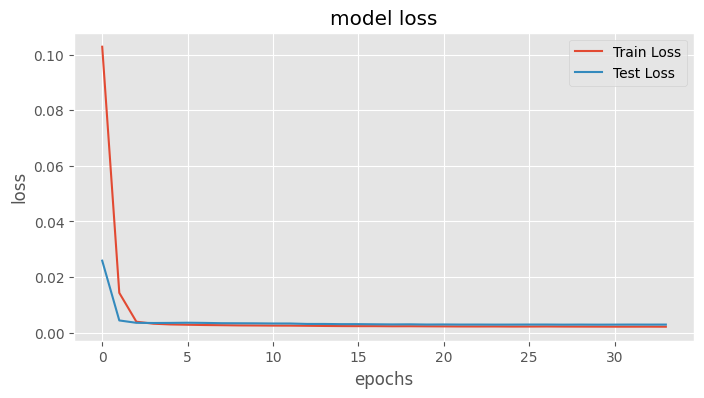

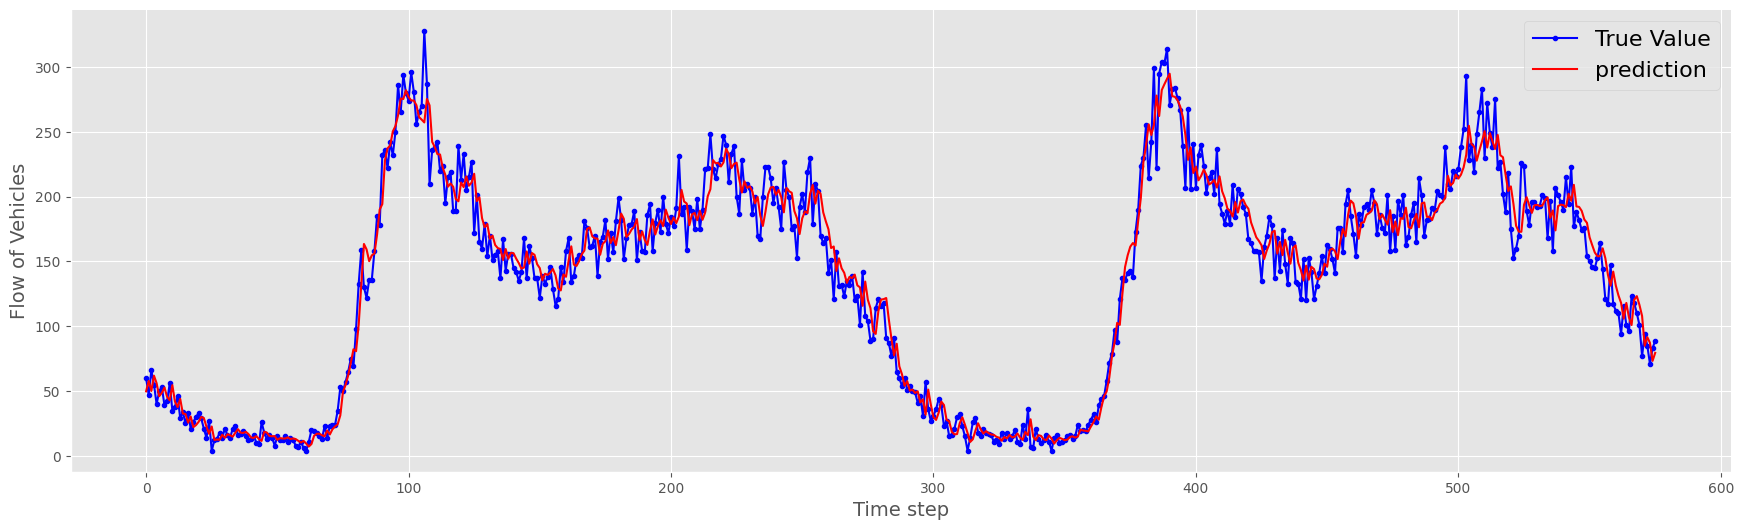

In [ ]:
lane_prediction(df,'Cross1','LSTM',12,2)

In [ ]:
lane_prediction(df,'Cross1','GRU',12,2)

TypeError: ignored

##### **Cross2**

Epoch 1/100
101/101 [==============================] - 9s 22ms/step - loss: 0.1195 - val_loss: 0.1010
Epoch 2/100
101/101 [==============================] - 2s 17ms/step - loss: 0.0388 - val_loss: 0.0136
Epoch 3/100
101/101 [==============================] - 1s 10ms/step - loss: 0.0064 - val_loss: 0.0047
Epoch 4/100
101/101 [==============================] - 1s 9ms/step - loss: 0.0029 - val_loss: 0.0037
Epoch 5/100
101/101 [==============================] - 1s 9ms/step - loss: 0.0022 - val_loss: 0.0030
Epoch 6/100
101/101 [==============================] - 1s 10ms/step - loss: 0.0019 - val_loss: 0.0029
Epoch 7/100
101/101 [==============================] - 1s 9ms/step - loss: 0.0018 - val_loss: 0.0028
Epoch 8/100
101/101 [==============================] - 1s 10ms/step - loss: 0.0017 - val_loss: 0.0027
Epoch 9/100
101/101 [==============================] - 1s 9ms/step - loss: 0.0017 - val_loss: 0.0027
Epoch 10/100
101/101 [==============================] - 1s 10ms/step - loss: 0.0016 - 

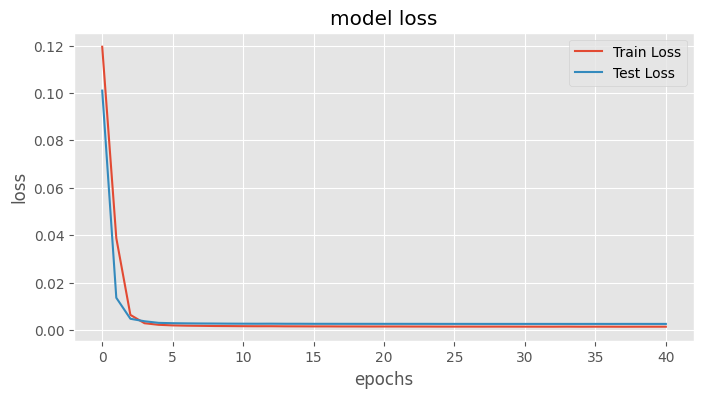

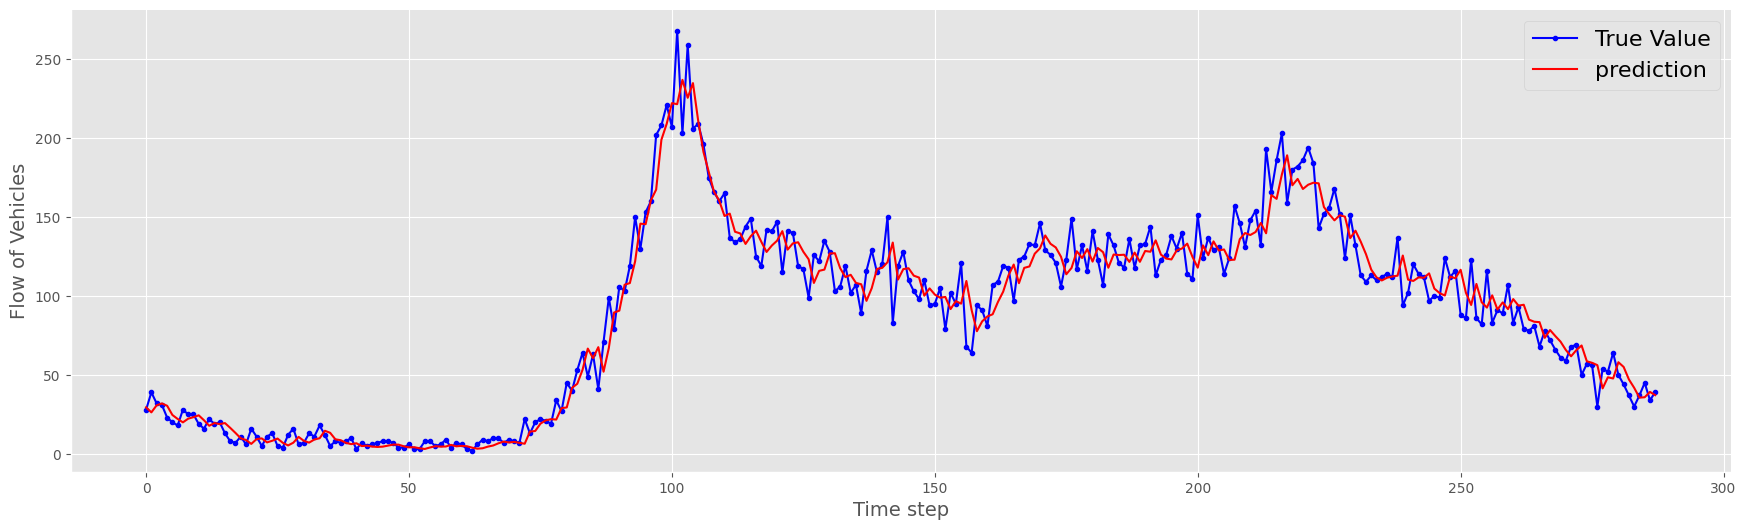

In [ ]:
lane_prediction(df,'Cross2','LSTM',12,1)

##### **Cross3**

Epoch 1/100
101/101 [==============================] - 6s 31ms/step - loss: 0.1094 - val_loss: 0.0391
Epoch 2/100
101/101 [==============================] - 2s 16ms/step - loss: 0.0188 - val_loss: 0.0039
Epoch 3/100
101/101 [==============================] - 2s 17ms/step - loss: 0.0033 - val_loss: 0.0029
Epoch 4/100
101/101 [==============================] - 1s 11ms/step - loss: 0.0026 - val_loss: 0.0028
Epoch 5/100
101/101 [==============================] - 2s 19ms/step - loss: 0.0024 - val_loss: 0.0026
Epoch 6/100
101/101 [==============================] - 1s 10ms/step - loss: 0.0023 - val_loss: 0.0026
Epoch 7/100
101/101 [==============================] - 1s 9ms/step - loss: 0.0021 - val_loss: 0.0025
Epoch 8/100
101/101 [==============================] - 1s 10ms/step - loss: 0.0021 - val_loss: 0.0025
Epoch 9/100
101/101 [==============================] - 1s 10ms/step - loss: 0.0020 - val_loss: 0.0024
Epoch 10/100
101/101 [==============================] - 1s 10ms/step - loss: 0.0019

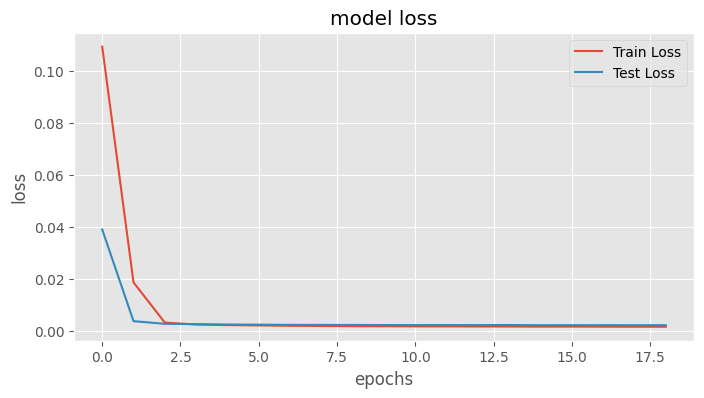

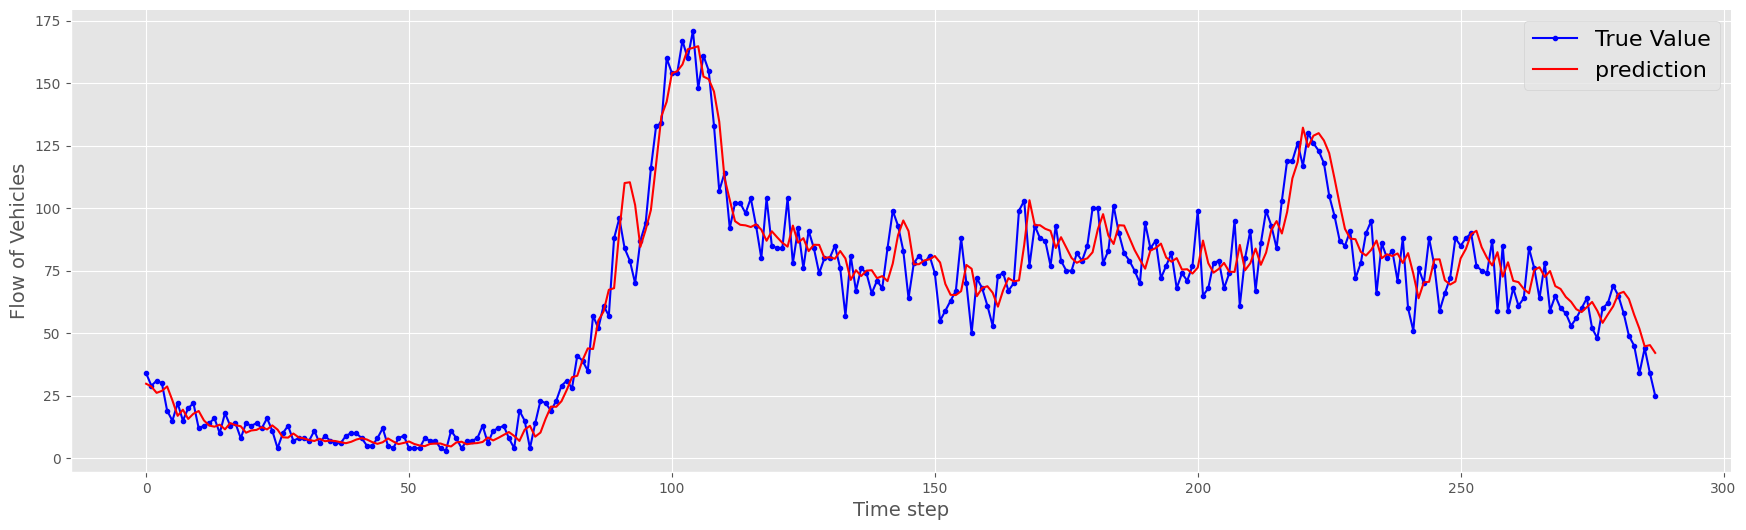

In [ ]:
lane_prediction(df,'Cross3','LSTM',12,1)

##### **Cross4**

Epoch 1/100
101/101 [==============================] - 4s 13ms/step - loss: 0.1163 - val_loss: 0.0351
Epoch 2/100
101/101 [==============================] - 1s 14ms/step - loss: 0.0205 - val_loss: 0.0049
Epoch 3/100
101/101 [==============================] - 2s 17ms/step - loss: 0.0040 - val_loss: 0.0040
Epoch 4/100
101/101 [==============================] - 2s 17ms/step - loss: 0.0034 - val_loss: 0.0042
Epoch 5/100
101/101 [==============================] - 2s 17ms/step - loss: 0.0032 - val_loss: 0.0039
Epoch 6/100
101/101 [==============================] - 1s 10ms/step - loss: 0.0031 - val_loss: 0.0037
Epoch 7/100
101/101 [==============================] - 1s 10ms/step - loss: 0.0029 - val_loss: 0.0036
Epoch 8/100
101/101 [==============================] - 1s 9ms/step - loss: 0.0029 - val_loss: 0.0036
Epoch 9/100
101/101 [==============================] - 1s 10ms/step - loss: 0.0028 - val_loss: 0.0036
Epoch 10/100
101/101 [==============================] - 1s 9ms/step - loss: 0.0028 

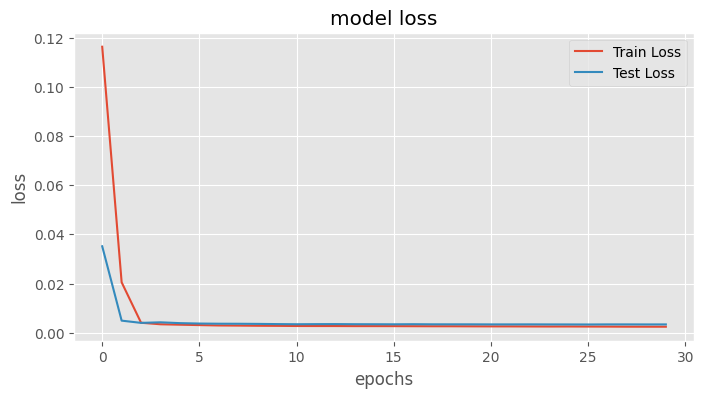

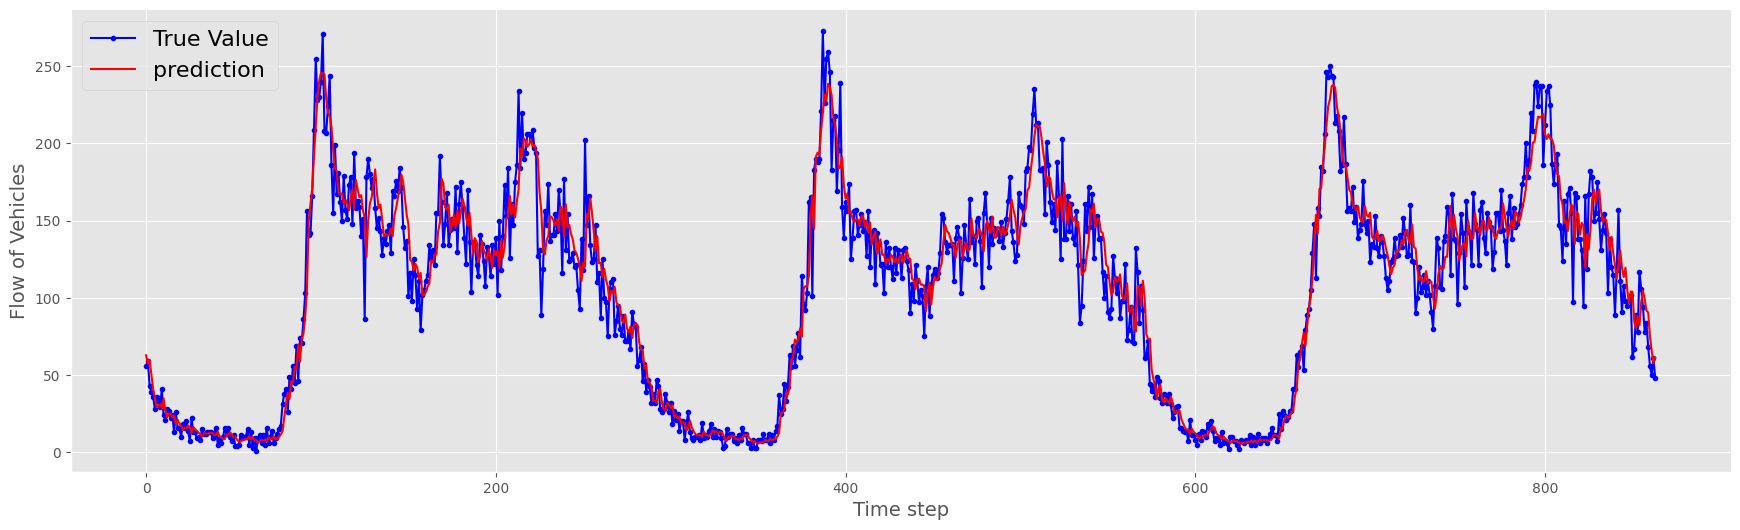

In [ ]:
lane_prediction(df,'Cross4','LSTM',12,3)